# Exploratory Data Analysis (EDA) (Notebook 1_Week 3 Deliverable_Part2)

### Import libraries

In [3]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading clean Dataset

In [4]:
# Load the data
df = pd.read_csv('declarations-exterminations-punaises-de-lit-1.csv')

#### Verify Datatype and make modifications

In [5]:
print(df.dtypes)

NO_DECLARATION        int64
DATE_DECLARATION     object
DATE_PRIOR_INSP      object
EXT_FREQ            float64
DATE_FIRST_EXT       object
DATE_LAST_EXT        object
HOOD_NUM             object
HOOD_NAME            object
BORO_NAME            object
MTM8_X              float64
MTM8_Y              float64
LONGITUDE           float64
LATITUDE            float64
LONG_LAT             object
MTM_X_Y              object
DEC_MONTH             int64
DEC_ISSUE             int64
DATE_DIFF           float64
dtype: object


In [6]:
# Convert 'DATE_INSP_VISPRE', 'DATE_DEBUTTRAIT', and 'DATE_FINTRAIT'
df['DATE_PRIOR_INSP'] = pd.to_datetime(df['DATE_PRIOR_INSP'])
df['DATE_FIRST_EXT'] = pd.to_datetime(df['DATE_FIRST_EXT'])
df['DATE_LAST_EXT'] = pd.to_datetime(df['DATE_LAST_EXT'])
df['DATE_DECLARATION'] = pd.to_datetime(df['DATE_DECLARATION'])
print(df.dtypes)

NO_DECLARATION               int64
DATE_DECLARATION    datetime64[ns]
DATE_PRIOR_INSP     datetime64[ns]
EXT_FREQ                   float64
DATE_FIRST_EXT      datetime64[ns]
DATE_LAST_EXT       datetime64[ns]
HOOD_NUM                    object
HOOD_NAME                   object
BORO_NAME                   object
MTM8_X                     float64
MTM8_Y                     float64
LONGITUDE                  float64
LATITUDE                   float64
LONG_LAT                    object
MTM_X_Y                     object
DEC_MONTH                    int64
DEC_ISSUE                    int64
DATE_DIFF                  float64
dtype: object


#### Dataframe summary

In [7]:
#print(df.shape)

print('Bed bug extermination declarations')
print('')
print('==================COLUMNS==================')
print(df.columns)
print('')
print('==================HEAD==================')
print(df.head())
print('')
print('==================TAIL==================')
print(df.tail())
print('')
print('==================DESCRIBE==================')
print(df.describe())

Bed bug extermination declarations

==================COLUMNS==================
Index(['NO_DECLARATION', 'DATE_DECLARATION', 'DATE_PRIOR_INSP', 'EXT_FREQ',
       'DATE_FIRST_EXT', 'DATE_LAST_EXT', 'HOOD_NUM', 'HOOD_NAME', 'BORO_NAME',
       'MTM8_X', 'MTM8_Y', 'LONGITUDE', 'LATITUDE', 'LONG_LAT', 'MTM_X_Y',
       'DEC_MONTH', 'DEC_ISSUE', 'DATE_DIFF'],
      dtype='object')

==================HEAD==================
   NO_DECLARATION DATE_DECLARATION DATE_PRIOR_INSP  EXT_FREQ DATE_FIRST_EXT  \
0            4254       2012-10-28      2012-09-21      1.00     2012-09-21   
1             830       2011-09-16      2011-07-13      1.00     2011-07-27   
2            1380       2011-11-08      2011-11-02      1.00     2011-11-07   
3             455       2011-08-10      2011-08-09      1.00     2011-08-09   
4            1243       2011-10-26      2011-09-16      1.00     2011-10-05   

  DATE_LAST_EXT HOOD_NUM      HOOD_NAME                            BORO_NAME  \
0    2012-09-21       2

In [8]:
print('==================BORO_VALUE_COUNT==================')
print(df['BORO_NAME'].value_counts())
print('')
print('==================ANALYSIS==================')
print('max:',np.max(df['BORO_NAME'].value_counts()))
print('min:',np.min(df['BORO_NAME'].value_counts()))
print('sum:',np.sum(df['BORO_NAME'].value_counts()))
print('mean:',np.mean(df['BORO_NAME'].value_counts()))
print('mean:',np.round(np.mean(df['BORO_NAME'].value_counts()),2))
print('std:',np.std(df['BORO_NAME'].value_counts()))
print('std:',np.round(np.std(df['BORO_NAME'].value_counts()),2))
print('median:',np.median(df['BORO_NAME'].value_counts()))
print ('count:',df['BORO_NAME'].value_counts().count())

==================BORO_VALUE_COUNT==================
Rosemont–La Petite-Patrie                   4320
Villeray–Saint-Michel–Parc-Extension        4304
Mercier–Hochelaga-Maisonneuve               4036
Le Plateau-Mont-Royal                       3696
Ville-Marie                                 3347
Côte-des-Neiges–Notre-Dame-de-Grâce         2909
Ahuntsic-Cartierville                       2695
Montréal-Nord                               1754
Le Sud-Ouest                                1251
Saint-Laurent                               1116
Saint-Léonard                                994
Verdun                                       782
Rivière-des-Prairies–Pointe-aux-Trembles     695
LaSalle                                      521
Lachine                                      361
Anjou                                        304
Outremont                                    145
Pierrefonds-Roxboro                          117
L'Île-Bizard–Sainte-Geneviève                 18
Name: BORO_NAME,

#### Create Declaration date Month and Year Columns

In [9]:
#We have this for month:
df['DEC_MONTH'] = pd.DatetimeIndex(df['DATE_DECLARATION']).month
df['DEC_YEAR'] = pd.DatetimeIndex(df['DATE_DECLARATION']).year

#### Correletation

In [10]:
df.corr()

,NO_DECLARATION,EXT_FREQ,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,DEC_MONTH,DEC_ISSUE,DATE_DIFF,DEC_YEAR
NO_DECLARATION,1.00,-0.05,-0.05,-0.00,-0.05,-0.00,0.08,nan,0.11,0.99
EXT_FREQ,-0.05,1.00,0.02,0.01,0.02,0.01,-0.05,nan,-0.03,-0.04
MTM8_X,-0.05,0.02,1.00,0.22,1.00,0.22,-0.00,nan,-0.07,-0.05
MTM8_Y,-0.00,0.01,0.22,1.00,0.22,1.00,0.02,nan,0.01,-0.01
LONGITUDE,-0.05,0.02,1.00,0.22,1.00,0.22,-0.00,nan,-0.07,-0.05
LATITUDE,-0.00,0.01,0.22,1.00,0.22,1.00,0.02,nan,0.01,-0.01
DEC_MONTH,0.08,-0.05,-0.00,0.02,-0.00,0.02,1.00,nan,0.05,-0.06
DEC_ISSUE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DATE_DIFF,0.11,-0.03,-0.07,0.01,-0.07,0.01,0.05,nan,1.00,0.10
DEC_YEAR,0.99,-0.04,-0.05,-0.01,-0.05,-0.01,-0.06,nan,0.10,1.00


There is a strong correlation between MTM8_X and Longitude, and another strong relationship between MTM8_Y and Latitude. All other relationships are negligible.

# Data Perspective
- One variable
    - Numeric variables
    - Categorical variables
Business Perspective

## One Variable (numeric)

==================DESCRIBE==================
count   33357.00
mean       37.00
std        79.00
min      -348.00
25%         6.00
50%        15.00
75%        39.00
max      3737.00
Name: DATE_DIFF, dtype: float64

==================DESCRIBE_without_NAN==================
count   33357.00
mean       37.00
std        79.00
min      -348.00
25%         6.00
50%        15.00
75%        39.00
max      3737.00
Name: DATE_DIFF, dtype: float64

median: 15.0
==================number_of_days_between_declaration_and_inspection==================


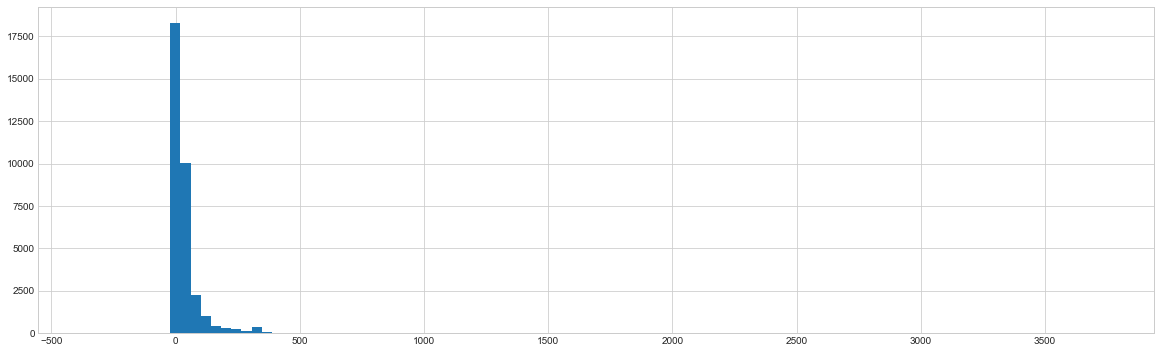

In [11]:
# Analyzing number of days between declaration and inspection

# Histogram
print('==================DESCRIBE==================')
print(df['DATE_DIFF'].describe().round())
print('')
print('==================DESCRIBE_without_NAN==================')
print(df['DATE_DIFF'].describe().round().dropna())
print('')
print('median: '+str(np.median(df['DATE_DIFF'].round().dropna())))


#Ref.: https://stackoverflow.com/questions/20656663/matplotlib-pandas-error-using-histogram
plt.figure(figsize=(20,6))
plt.hist(df['DATE_DIFF'].dropna(), bins=100) # drop nan
print('==================number_of_days_between_declaration_and_inspection==================')
plt.show()

The mean is more than half of the median, which indicates a strong variability in the number of days between the declaration date and the inspection date.

## One Variable (categorical)

### Boroughs

==================BORO_DESC==================
Rosemont–La Petite-Patrie               4320
Villeray–Saint-Michel–Parc-Extension    4304
Mercier–Hochelaga-Maisonneuve           4036
Le Plateau-Mont-Royal                   3696
Ville-Marie                             3347
Name: BORO_NAME, dtype: int64

==================TOP_4==================
First 4 locations represent 49.0 % of total declarations counts



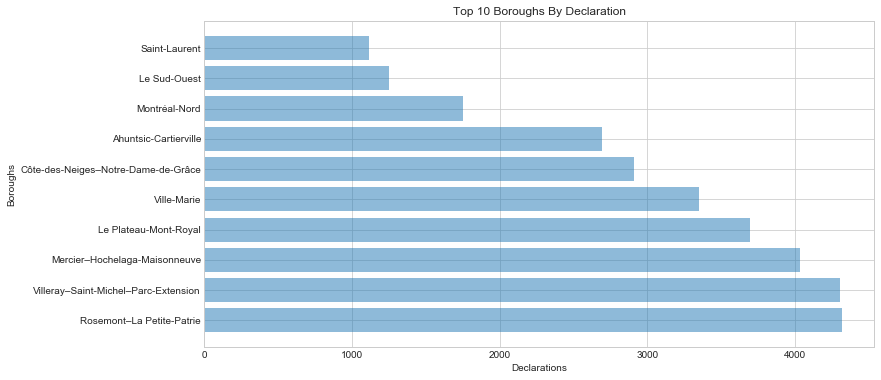

In [20]:
# Ref. : https://pythonspot.com/matplotlib-bar-chart/
# Ref. : https://python-graph-gallery.com/2-horizontal-barplot/

# Analyze by borough distribution with horizontal bar chart
print('==================BORO_DESC==================')
print(df['BORO_NAME'].value_counts().head())
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['BORO_NAME'].value_counts()[1]
             +df['BORO_NAME'].value_counts()[2]
             +df['BORO_NAME'].value_counts()[3])
           /(df['BORO_NAME'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Boroughs By Declaration')

labels = df['BORO_NAME'].value_counts().head(10).index
values = df['BORO_NAME'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.ylabel('Boroughs')
plt.xlabel('Declarations')


plt.show()

In [22]:
# Ref. : https://pythonspot.com/matplotlib-bar-chart/
# Ref. : https://python-graph-gallery.com/2-horizontal-barplot/

# Analyze by borough distribution with horizontal bar chart
print('==================TOP_10_BORO==================')
((df.groupby(['BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))


==================TOP_10_BORO==================


,EXT_QT,DECL_QT
BORO_NAME,,
Rosemont–La Petite-Patrie,6571.00,4320
Villeray–Saint-Michel–Parc-Extension,6197.00,4304
Mercier–Hochelaga-Maisonneuve,6005.00,4036
Le Plateau-Mont-Royal,5690.00,3696
Ville-Marie,5031.00,3347
Côte-des-Neiges–Notre-Dame-de-Grâce,4196.00,2909
Ahuntsic-Cartierville,3719.00,2695
Montréal-Nord,2476.00,1754
Le Sud-Ouest,1715.00,1251


For boroughs orders in descending order based on extermination reports, the order remains unchanged when descending based on the number of declarations.

### Neighborhoods

==================TOP_10_HOOD==================
Sainte-Marie      1730
Crémazie          1205
Parc-Extension    1171
Maisonneuve       1150
Lorimier           964
Vieux-Rosemont     938
Est                866
Père-Marquette     800
Cartierville       793
Montagne           792
Name: HOOD_NAME, dtype: int64

==================TOP_4==================
First 4 locations represent 24.0 % of total declarations counts



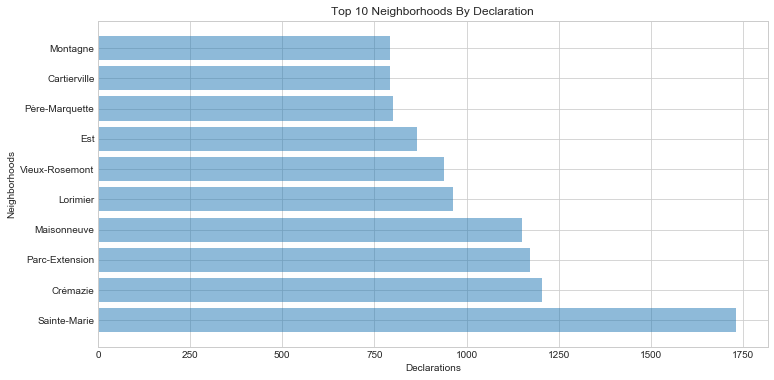

In [14]:
# Analyze Neighborhood distribution
print('==================TOP_10_HOOD==================')
print(df['HOOD_NAME'].value_counts().head(10))
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['HOOD_NAME'].value_counts()[1]
             +df['HOOD_NAME'].value_counts()[2]
             +df['HOOD_NAME'].value_counts()[3])
           /(df['HOOD_NAME'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Neighborhoods By Declaration')

plt.ylabel('Neighborhoods')
plt.xlabel('Declarations')

labels = df['HOOD_NAME'].value_counts().head(10).index
values = df['HOOD_NAME'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()

In [19]:
# Analyze Neighborhood distribution
print('==================TOP_10_HOOD==================')
((df.groupby(['HOOD_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

==================TOP_10_HOOD==================


,EXT_QT,DECL_QT
HOOD_NAME,,
Sainte-Marie,2854.00,1730
Crémazie,1953.00,1205
Maisonneuve,1763.00,1150
Parc-Extension,1534.00,1171
Lorimier,1399.00,964
Père-Marquette,1392.00,800
Vieux-Rosemont,1319.00,938
Est,1216.00,866
Parc-Laurier,1213.00,670


The order for neighborhoods is different when descending based based on extermination reports rather than the number of declarations.

When comparing the results between boroughs and neighborhoods, the number of exterminations reports per declaration is more apparent at the neighborhood level. Specifically, it is possible to have more reports for a neighborhood, while having fewer exterminations reports. This is not apparent at the borough level.

### Quantity of Declarations per Month

In [14]:
# Analyze Months distribution from declaration
print('==================DECLARATION_BY_MONTH_DESC==================')
print( (df['DEC_MONTH'].value_counts()).sort_index() )
print('')

df_m_sorted = (df['DEC_MONTH'].value_counts()).sort_index()

==================DECLARATION_BY_MONTH_DESC==================
1     2031
2     2264
3     2186
4     2069
5     2069
6     2552
7     3217
8     3202
9     3671
10    4022
11    3379
12    2703
Name: DEC_MONTH, dtype: int64



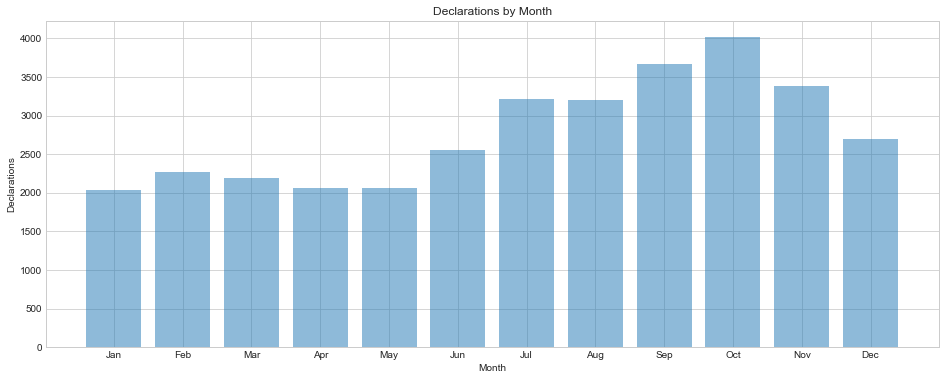

In [15]:
# Bar Chart

plt.figure(figsize=(16,6))
plt.title('Declarations by Month')
plt.xlabel('Month')
plt.ylabel('Declarations')

labels = df_m_sorted.index
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
values = df_m_sorted.values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

### Intersections

==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================
-73.571239_45.584338                     264
-73.659233_45.569024                     181
-73.620588_45.551456                     151
-73.582592_45.49409                      148
-73.68714399999999_45.518173             139
-73.58043_45.492816999999995             136
-73.60591600000001_45.428377000000005    116
-73.563652_45.528809                     114
-73.604952_45.58441                      107
-73.634049_45.504446                     101
Name: LONG_LAT, dtype: int64

==================TOP_4==================
First 4 locations represent 14.0 % of total declarations counts



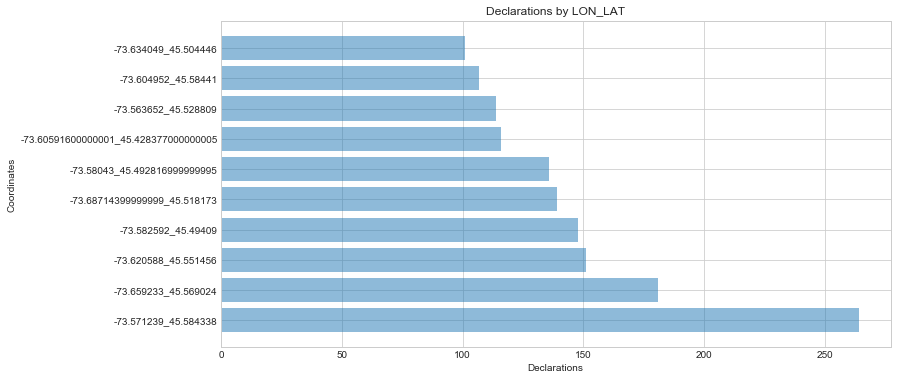

In [16]:
print('==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================')
# Analyze Coordinates distribution from declaration
print(df['LONG_LAT'].value_counts().head(10))
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['LONG_LAT'].value_counts()[1]
             +df['LONG_LAT'].value_counts()[2]
             +df['LONG_LAT'].value_counts()[3])
           /(df['LONG_LAT'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')


# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by LON_LAT')

plt.ylabel('Coordinates')
plt.xlabel('Declarations')

labels = df['LONG_LAT'].value_counts().head(10).index
values = df['LONG_LAT'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()


#### Quantities of extermination reports and declarations

In [17]:
# Ref. : https://stackoverflow.com/questions/37965380/python-pandas-simple-pivot-table-sum-count
    # Ref. : https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# Ref. : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
print('')
print('==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================')
((df.groupby(['LONG_LAT','HOOD_NAME','BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))


==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================


,,,EXT_QT,DECL_QT
LONG_LAT,HOOD_NAME,BORO_NAME,,
-73.571239_45.584338,Grande-Prairie,Saint-Léonard,352.00,264
-73.68714399999999_45.518173,Grenet,Saint-Laurent,302.00,139
-73.630494_45.509854,Parc-Kent,Côte-des-Neiges–Notre-Dame-de-Grâce,210.00,67
-73.659233_45.569024,Sault-au-Récollet,Ahuntsic-Cartierville,193.00,181
-73.585636_45.527404,Parc-Laurier,Le Plateau-Mont-Royal,189.00,79
-73.600298_45.637873,Marc-Aurèle-Fortin,Rivière-des-Prairies–Pointe-aux-Trembles,181.00,76
-73.61954399999999_45.545823999999996,Crémazie,Villeray–Saint-Michel–Parc-Extension,176.00,74
-73.53832299999999_45.543811,Hochelaga,Mercier–Hochelaga-Maisonneuve,164.00,63
-73.582592_45.49409,Montagne,Ville-Marie,162.00,148


By going from the neighborhood to the intersection level, the number of extermination reports is more apparent is being independent from the number of declarations.

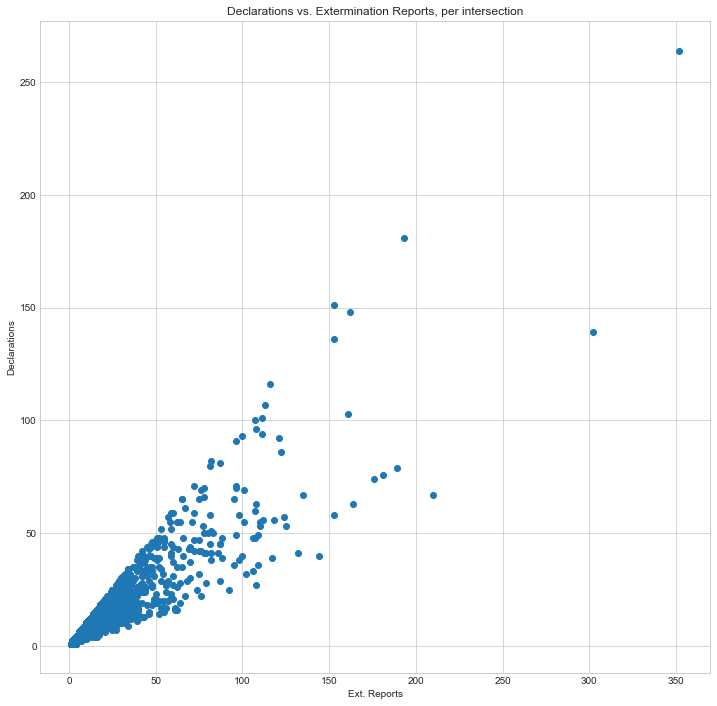

In [18]:
df_coff = ((df.groupby(['LONG_LAT','HOOD_NAME','BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )
# Scatter plot
plt.figure(figsize=(12,12))
plt.title('Declarations vs. Extermination Reports, per intersection')

plt.ylabel('Declarations')
plt.xlabel('Ext. Reports')

plt.plot(df_coff['EXT_QT'], df_coff['DECL_QT'], 'o')
plt.show()

There is a proportional relationship between the number of declarations and the number of extermination reports. Specifically, one report is assumed to be included in one declaration, as a minimum, while up to four reports can be included in a declaration by definition. This two ranges form the diagonals that bound the dataset and form the cone shap in the figure herein.

#### View of Boroughs based on Declaration quantity

In [19]:
# intersections for boroughs
intersection_highest = df['BORO_NAME'].value_counts().head(1).index[0]
intersection_lowest = df['BORO_NAME'].value_counts().tail(1).index[0]

# dataframes
df_intersection_highest = df[df['BORO_NAME'] == intersection_highest]
df_intersection_lowest = df[df['BORO_NAME'] == intersection_lowest]

# modified dataframes
df_highest = ((df_intersection_highest.groupby(['LONG_LAT'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )

df_lowest = ((df_intersection_lowest.groupby(['LONG_LAT'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )

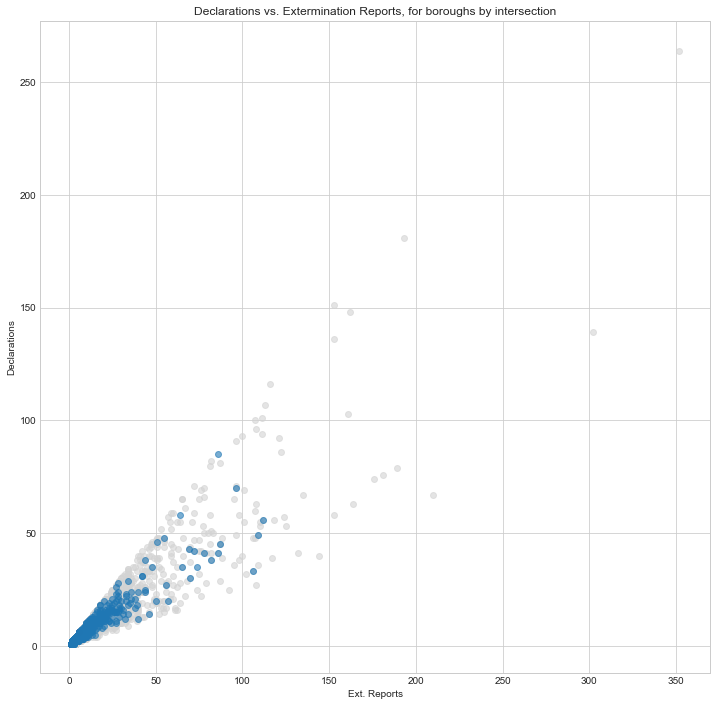

In [20]:
# Scatter plot
plt.figure(figsize=(12,12))
plt.title('Declarations vs. Extermination Reports, for boroughs by intersection')

plt.ylabel('Declarations')
plt.xlabel('Ext. Reports')

plt.plot(df_coff['EXT_QT'], df_coff['DECL_QT'], 'o', color='lightgray', alpha=0.6)

# L'Île-Bizard–Sainte-Geneviève 
plt.plot(df_lowest['EXT_QT'], df_lowest['DECL_QT'], 'o', color='red', alpha=0.8)
# Rosemont–La Petite-Patrie 
plt.plot(df_highest['EXT_QT'], df_highest['DECL_QT'], 'o', alpha=0.6)

plt.show()


In [21]:
df_highest.corr()

,EXT_QT,DECL_QT
EXT_QT,1.00,0.93
DECL_QT,0.93,1.00


The borough, Rosemont–La Petite-Patrie, with the highest declarations quantity has a correlation coefficient of 0.93, with a strong indication of a relationship between the number of declarations and the number of exterminations per declarations.

#### View of Neighborhood based on Neight quantity

In [22]:
# intersections for boroughs
intersection_highest = df['HOOD_NAME'].value_counts().head(1).index[0]
intersection_lowest = df['HOOD_NAME'].value_counts().tail(1).index[0]

# dataframes
df_intersection_highest = df[df['HOOD_NAME'] == intersection_highest]
df_intersection_lowest = df[df['HOOD_NAME'] == intersection_lowest]

# modified dataframes
df_highest = ((df_intersection_highest.groupby(['LONG_LAT'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )

df_lowest = ((df_intersection_lowest.groupby(['LONG_LAT'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )

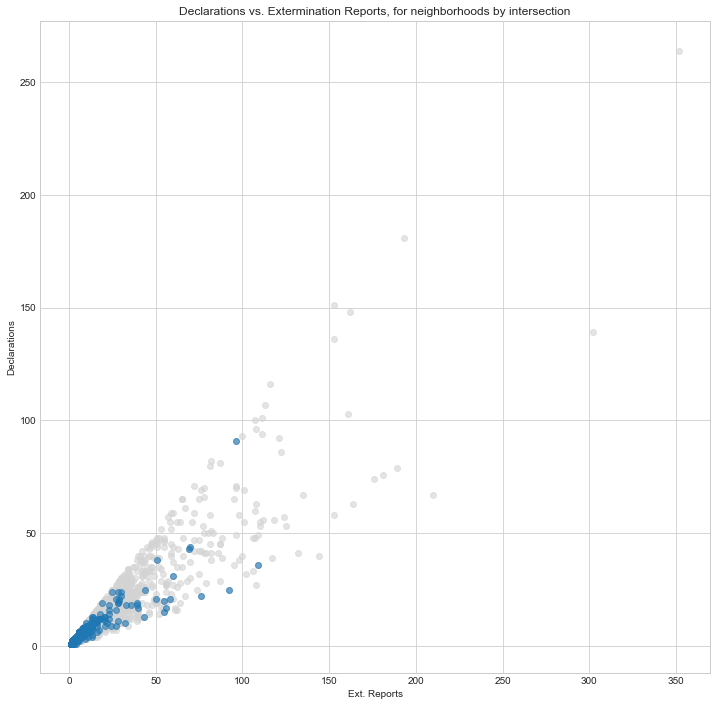

In [25]:
# Scatter plot
plt.figure(figsize=(12,12))
plt.title('Declarations vs. Extermination Reports, for neighborhoods by intersection')

plt.ylabel('Declarations')
plt.xlabel('Ext. Reports')

plt.plot(df_coff['EXT_QT'], df_coff['DECL_QT'], 'o', color='lightgray', alpha=0.6)

# L'Île-Bizard–Sainte-Geneviève 
plt.plot(df_lowest['EXT_QT'], df_lowest['DECL_QT'], 'o', color='red', alpha=0.8)
# Sainte-Marie 
plt.plot(df_highest['EXT_QT'], df_highest['DECL_QT'], 'o', alpha=0.6)

plt.show()

In [26]:
df_highest.corr()

,EXT_QT,DECL_QT
EXT_QT,1.00,0.86
DECL_QT,0.86,1.00


The neighborhood, Sainte-Marie, with the highest declarations quantity has a correlation coefficient of 0.86, with an indication of a relationship between the number of declarations and the number of exterminations per declarations; although, the relationship is not as strong as the borough level.

### Over time trend

In [35]:
df.groupby(['BORO_NAME','DEC_YEAR'])['BORO_NAME'].count().head()

BORO_NAME              DEC_YEAR
Ahuntsic-Cartierville  2011         92
                       2012        145
                       2013        447
                       2014        522
                       2015        451
Name: BORO_NAME, dtype: int64

In [49]:
((df.groupby(['HOOD_NAME','DEC_YEAR'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head())

EXT_QT  DECL_QT
HOOD_NAME    DEC_YEAR                 
Sainte-Marie 2013      914.00      416
Maisonneuve  2013      479.00      249
Crémazie     2013      407.00      189
Sainte-Marie 2014      383.00      235
             2015      360.00      245

#### Borough by month

In [69]:
# pivot table a dataframe

# Ref.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
df.pivot_table(index = 'BORO_NAME', 
               columns = 'DEC_MONTH',
               aggfunc = 
                   {'NO_DECLARATION':'count'},
               fill_value = 0, #verify why there are Nan values
               dropna = True
               )

NO_DECLARATION                      \
DEC_MONTH                                            1    2    3    4    5    
BORO_NAME                                                                     
Ahuntsic-Cartierville                               166  186  159  140  145   
Anjou                                                18   12   26   16   18   
Côte-des-Neiges–Notre-Dame-de-Grâce                 225  224  163  182  191   
L'Île-Bizard–Sainte-Geneviève                         2    0    0    0    2   
LaSalle                                              18   53   23   33   23   
Lachine                                              25   29   29   27   20   
Le Plateau-Mont-Royal                               210  222  228  226  209   
Le Sud-Ouest                                         71  127  166  116   90   
Mercier–Hochelaga-Maisonneuve                       260  248  255  225  241   
Montréal-Nord                                        75  111  109  101   83   
Outremont                                             8   16   19    9    4   
Pierrefonds-Roxboro                                   5    8    5    4    2   
Rivière-des-Prairies–Pointe-aux-Trembles             47   42   59   47   31   
Rosemont–La Petite-Patrie                           238  289  256  277  224   
Saint-Laurent                                        71   65   54   62  306   
Saint-Léonard                                        91   77   44   50   58   
Verdun                                               41   44   59   44   42   
Ville-Marie                                         207  251  222  213  159   
Villeray–Saint-Michel–Parc-Extension                253  260  310  297  221   

                                                                             
DEC_MONTH                                  6    7    8    9    10   11   12  
BORO_NAME                                                                    
Ahuntsic-Cartierville                     169  275  282  326  309  305  233  
Anjou                                      26   29   24   44   33   36   22  
Côte-des-Neiges–Notre-Dame-de-Grâce       226  290  271  273  323  309  232  
L'Île-Bizard–Sainte-Geneviève               1    0    3    2    4    3    1  
LaSalle                                    30   65   72   58   48   61   37  
Lachine                                    21   32   32   38   47   32   29  
Le Plateau-Mont-Royal                     292  341  381  399  491  434  263  
Le Sud-Ouest                              127   73  105   79  115  104   78  
Mercier–Hochelaga-Maisonneuve             324  443  381  436  449  427  347  
Montréal-Nord                             122  173  188  208  232  204  148  
Outremont                                   8   21    9   13   13   10   15  
Pierrefonds-Roxboro                         3   19   17   14   17    9   14  
Rivière-des-Prairies–Pointe-aux-Trembles   88   66   58   51   78   65   63  
Rosemont–La Petite-Patrie                 329  421  436  597  539  372  342  
Saint-Laurent                              57  101   80  114   85   59   62  
Saint-Léonard                              73   95   79   45  145  103  134  
Verdun                                     73   82   82   81   92   88   54  
Ville-Marie                               264  279  272  395  430  379  276  
Villeray–Saint-Michel–Parc-Extension      319  412  430  498  572  379  353

#### Borough by year

In [68]:
# pivot table a dataframe

# Ref.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
df.pivot_table(index = 'BORO_NAME', 
               columns = 'DEC_YEAR',
               aggfunc = 
                   {'EXT_FREQ': sum, 'NO_DECLARATION':'count'},
               fill_value = 0, #verify why there are Nan values
               dropna = True
               )

EXT_FREQ                              \
DEC_YEAR                                     2011 2012  2013  2014  2015 2016   
BORO_NAME                                                                       
Ahuntsic-Cartierville                         131  218   794   687   557  432   
Anjou                                          26   35   125    54    67   48   
Côte-des-Neiges–Notre-Dame-de-Grâce           228  289   469   574   651  872   
L'Île-Bizard–Sainte-Geneviève                   2    0     5     4     8    1   
LaSalle                                        35   56    51    66   116   96   
Lachine                                        28   64    90    60    57   31   
Le Plateau-Mont-Royal                         259  437  1105   857   773  824   
Le Sud-Ouest                                   66  258   464   206   230  218   
Mercier–Hochelaga-Maisonneuve                 319  529  1517   773   834  738   
Montréal-Nord                                 129  261   409   334   363  341   
Outremont                                       3   16    24    37    53   51   
Pierrefonds-Roxboro                            16    9    16    21    24   28   
Rivière-des-Prairies–Pointe-aux-Trembles       26   60   265   130   143  113   
Rosemont–La Petite-Patrie                     324  426  1235  1063  1111  833   
Saint-Laurent                                  54  105   173   375   409   83   
Saint-Léonard                                  30  120   355   267   177   98   
Verdun                                         64  128   178   127   170   98   
Ville-Marie                                   248  407  1344   752   782  570   
Villeray–Saint-Michel–Parc-Extension          264  451  1183  1056   923  819   

                                                   NO_DECLARATION            \
DEC_YEAR                                 2017 2018           2011 2012 2013   
BORO_NAME                                                                     
Ahuntsic-Cartierville                     519  381             92  145  447   
Anjou                                      70   38             22   25   54   
Côte-des-Neiges–Notre-Dame-de-Grâce       616  497            181  213  365   
L'Île-Bizard–Sainte-Geneviève               0    0              2    0    5   
LaSalle                                   182  129             34   42   37   
Lachine                                   117  111             22   41   54   
Le Plateau-Mont-Royal                     705  730            212  308  612   
Le Sud-Ouest                              118  155             60  130  356   
Mercier–Hochelaga-Maisonneuve             586  709            236  398  786   
Montréal-Nord                             377  262             94  173  279   
Outremont                                  17   15              3   13   18   
Pierrefonds-Roxboro                        34   24             13    7   12   
Rivière-des-Prairies–Pointe-aux-Trembles  124  180             20   42  119   
Rosemont–La Petite-Patrie                 876  703            242  327  666   
Saint-Laurent                             428   79             42   89  126   
Saint-Léonard                             157  102             28  112  290   
Verdun                                    106  161             55   79  136   
Ville-Marie                               378  550            200  302  693   
Villeray–Saint-Michel–Parc-Extension      861  640            193  325  632   

                                                                   
DEC_YEAR                                 2014 2015 2016 2017 2018  
BORO_NAME                                                          
Ahuntsic-Cartierville                     522  451  326  412  300  
Anjou                                      39   43   37   51   33  
Côte-des-Neiges–Notre-Dame-de-Grâce       422  477  543  359  349  
L'Île-Bizard–Sainte-Geneviève               4    6    1    0    0  
LaSalle                                    

# Business Perspective

## Data Persepective

## One Variable

### Categorical

There are a few categorical values that we can generate utilizing our data.  This would be counts based on neighborhood (NOM_QR), borough (NOM_ARROND), declaration date (DATE_DECLARATION) and intersection location (COORD_X x COORD_Y) for longitude and latitude.  This would give us different insights on the infestations declared in the various areas of the city. 

### Numerical

Based on the categorical values we generated above, we can then establish Min, Max, Mean values based on those Counts.  We can also generate Sums based on the number of visits by location or by time of year (based on declaration dates) to possibly gain insight on variables such as temperature or moving period (seasonal). 

## Multiple Variables

Multi variable statistics can also be generated based on our dataset to try and establish trends and gain further insight. Examples of such include:

-	Counts on borough (NOM_ARROND) and neighborhood (NOM_QR) by date of declaration
-	Number of days between DATE_INSP_VISPRE and DATE_DECLARATION. 
(Long waiting period can cause infestations to spread.)
-	Number of days between DATE_DECLARATION - DATE_DEBUTTRAIT
-	(Long waiting period can cause infestations to spread.)


# Business Persepective

### Descriptive Data Analysis

■ Descriptive Analytics

What happened? We know that there were exterminations at this location (intersection) in the past, sometimes frequently.


The number of extermination and declaration is not limited to a single borough and neighborhood. Three of the boroughs with the highest count of declarations are in promimity of each other. Although, the intersection (-73.571239_45.584338) with highest extermination reports and declaration count is not in the top borough and is not in the top neighborhood. It may be an outlier and further investigation is required.

■ Descriptive Analytics

What happened? We know that there were exterminations at this location (intersection) in the past, sometimes frequently.

The top intersection are not in the same neighborhood. Relative proximity between the intersections is not yet calculated, in order to distinguish proximity from being part of neighborhood or borough.

### Diagnostic Data Analysis

Bedbugs can spread and infest an area in numerous ways.  Based on government reports we know infestations can spread by human contact (clothing), unsanitary environments, along with used furniture and mattresses to name a few.  This exercise in data mining has been undertaken to potentially uncover flash points, periods and/or locations that can possibly bring to light problematic scenarios that we can rectify and decrease, if not eliminate, future infestations.

#1 Number of days between Inspection/Declaration and Start-End of extermination.  
(Given a lengthy waiting period we could have a potential opportunity for spreading)  

The lead time between the Declaration and Inspection dates is 6-15 days based on the histogram above.

#2 Identify the most problematic boroughs
(What is the difference between worst and best ranked)

In [18]:
print('==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================')
((df.groupby(['LONG_LAT','HOOD_NAME','BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================


,,,EXT_QT,DECL_QT
LONG_LAT,HOOD_NAME,BORO_NAME,,
-73.571239_45.584338,Grande-Prairie,Saint-Léonard,352.00,264
-73.68714399999999_45.518173,Grenet,Saint-Laurent,302.00,139
-73.630494_45.509854,Parc-Kent,Côte-des-Neiges–Notre-Dame-de-Grâce,210.00,67
-73.659233_45.569024,Sault-au-Récollet,Ahuntsic-Cartierville,193.00,181
-73.585636_45.527404,Parc-Laurier,Le Plateau-Mont-Royal,189.00,79
-73.600298_45.637873,Marc-Aurèle-Fortin,Rivière-des-Prairies–Pointe-aux-Trembles,181.00,76
-73.61954399999999_45.545823999999996,Crémazie,Villeray–Saint-Michel–Parc-Extension,176.00,74
-73.53832299999999_45.543811,Hochelaga,Mercier–Hochelaga-Maisonneuve,164.00,63
-73.582592_45.49409,Montagne,Ville-Marie,162.00,148


#3 Identify the most problematic neighborhood
(What is the difference between worst and best ranked)

In [25]:
print('==================TOP_10_BORO==================')
print((df.groupby(['BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

print('')
print('==================TOP_10_HOOD==================')
print((df.groupby(['BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

==================TOP_10_BORO==================
                                      EXT_QT  DECL_QT
BORO_NAME                                            
Rosemont–La Petite-Patrie            6571.00     4320
Villeray–Saint-Michel–Parc-Extension 6197.00     4304
Mercier–Hochelaga-Maisonneuve        6005.00     4036
Le Plateau-Mont-Royal                5690.00     3696
Ville-Marie                          5031.00     3347
Côte-des-Neiges–Notre-Dame-de-Grâce  4196.00     2909
Ahuntsic-Cartierville                3719.00     2695
Montréal-Nord                        2476.00     1754
Le Sud-Ouest                         1715.00     1251
Saint-Laurent                        1706.00     1116

==================TOP_10_HOOD==================
                                      EXT_QT  DECL_QT
BORO_NAME                                            
Rosemont–La Petite-Patrie            6571.00     4320
Villeray–Saint-Michel–Parc-Extension 6197.00     4304
Mercier–Hochelaga-Maisonneuve        60

#4 Based on 2 and 3, is the issue borough wide or at neighborhood level? 
(Management issue)

It is neither borough nor neighborhood specific, but rather specific to an intersection.

#5 When was the declaration made?
(Is the problem based on a specific time of year? Heat? Moving period?)

The quantity of declarations rise from June to October, then fall to December. The rest of the year, from January to May, there is no relative change in the declarations month to month.

#6 Is a problem more relevant to a particular block?
(COORD_X x COORD_Y)

-73.571239_45.584338

#7 Nbr_Exterminations x COORD_X x COORD_Y x Nom_QR
(Can the issue be subject to extermination mismanagement?) 

-73.571239_45.584338 	Grande-Prairie 	Saint-Léonard